# Final project Data 608

    Project Members :- Samriti Malhotra & Vishal Arora


## Covid-19 impact on restaurant business.
 
In addition to its severe cost to human life, the novel coronavirus has wreaked havoc on a number of industries including 
airlines, cruises, and Food industry. As people and governments and public health experts stress the importance of social 
distancing as a way to stem the spread of the contagion, restaurants are seeing major declines in patronage. Across the 
country the number of COVID-19 cases are increasing - and the number of restaurant patrons are plummeting.Many restaurants 
are now paralyzed across US and whole world.

During this project we wanted to show the impact of covid-19 through visualization and also in turn utilise as many various 
Data Visualization techniques we learned dring our course of Data 608.The intent was learn n utilise as many various ways to 
visualize the data and also explore various packages available for Data Visulaization using R & Python. In this we have extracted the data from OpenTable.com site which is an online restaurant booking site, wherein user can book a restaurant and also if they want particular seats within a restaurants and open table provides reviews for restaurants. They are active since 1998 and has been doing thier bit in this pandemic by taking online orders to be delivered.

Opentable dataset can be extracted from below link, though the dataset is small from 02/18 - 05/10 and is regularly updated.The dataset contains data from various countries and states and cities through out the world where open table has presence. But mainly the data if from US restaurants.

    >>   https://www.opentable.com/state-of-industry


## Steps for Data Visualization.

 First step is to import all the necessary modules for Data wrangling and cleaning , before having the data available for Data visualization. The dataset was taken from opentable.com site which was in the form of CSV, for the sake of continuity we downloaded and uploaded the csv in github. Using read_csv function using panda library the csv is loaded into a dataframe and using head function to get an overlook of the data, we can also use describe function to get statistical summary of each column for dataset  or in turn use info function to get more details regarding data such a data type of each column how many observations and columns are there in our data.

### Enhancing Data visualization through Tooltips for Country dataset

> Using melt function from pandas library to reshape the data from wide to long form.
> Format the datee columns to datetype using pandas library function to_datatime to convert char to date type.
> Filtered the data into different groups based on the Type column values  of the such as if  Type=='country' etc..
> After this step we have 3 different datasets  namely Country | State | City.
> Next step was to view the dataset for countries and then we used plotly.express to draw line graph for all contries during 
  the time frame of Feb-18,2020 to May-10,2020. We can clearly see that on Mar 17th or 18th , globaly and also in US the   
  lockdown came into that the time period when restaurant business went down Year on year(YoY) to -100 in comparison to year 
  2019.We can see that on Feb-18 itself the restaurant business started getting impacted as nearly for the countries we can see 
  YoY index was close to 0, except Germany which was still in positive and only after Mar 8th , Germany YoY index went 
  drastically below into negative. If you place the cursor on the markers on the line a tooltip will pop out which will give 
  the name of the country , date and also the YoY index for the country.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from ipywidgets import widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import seaborn as sns
import warnings



warnings.filterwarnings('ignore')
#import calendar


# load data from github, as downloaded from opentable site 
restra = pd.read_csv("https://raw.githubusercontent.com/samriti0202/Data608/master/Final%20Project/state_of_industry_data.csv")
# to show the
restra.head()


restra_tidy = restra.melt(id_vars=["Type" , "Name"] , var_name = "dates" , value_name = "YoY")

restra_tidy['dates'] = restra_tidy['dates']+"/2020"
restra_tidy['dates'] = pd.to_datetime(restra_tidy['dates'])


restra_city = restra_tidy[restra_tidy["Type"] == 'city']

restra_country = restra_tidy[restra_tidy["Type"] == 'country']

restra_state = restra_tidy[restra_tidy["Type"] == 'state']


# Visualizing Country dataset and drawing line plot to se how restaurant business fared in 
# each countty and Global faried during this Covid-19 from Feb 2020 to May 2020.

fig = px.line(restra_country, x="dates", y="YoY", color="Name", title="Covid-19 impact on restaurants for Countries")
fig.update_layout(margin=dict(l=70, r=70, t=70, b=70), paper_bgcolor="white",template="simple_white")
fig.update_traces(mode="markers+lines")
fig.show()



### Interactive Data Visualization for State dataset
 > Visualizing the datset using the sample function from pandas library to have a look n feel about our State dataset.
 
 > Used ipywidgets & seaborn modules to create a line plot and  have the line plot controlled through widgets i.e. 
   DropDown for selecting the State and also having the option to drill down on dates using the Slider widget to control 
   the x-axis data against which the line plot will be drawn. IPYWidget library is a wonderfull library in Python which 
   gives the flexibility to draw widgets and make our graphs interactive. There is an option in IPYWidgets to control the
   updation of graphs on the change of widgets values either automatically or manually i.e. As in the example below 
   Graphs are getting updated whenever the user selects the dropdown value or uses slider . But in case we have Graphs which
   are heavy of calculations then we can interact_manually function to control the updation of Graphs on user action, i.e. the 
   Graphs will only get updated when user clicks a button or something else, rather then on the change of value of widgets thus 
   giving time to do the calculations in backend.
   
 > The same was done through R and modules like tidyverse for Data wrangling and plotly for plotting the Line Graph and Shiny
   for making graphs more interactive and uploaded to Shiny Sever. Shiny App link for displaying the graph as per states done 
   in R.
   
 
     >  https://samriti.shinyapps.io/DATA608_OT_state_rsrv/
   



SelectionRangeSlider(description='Dates : ', index=(0, 82), layout=Layout(width='400px'), options=(('02/18', T…

Dropdown(description='States : ', options=('Alabama', 'Alberta', 'Arizona', 'Baja California Sur', 'British Co…

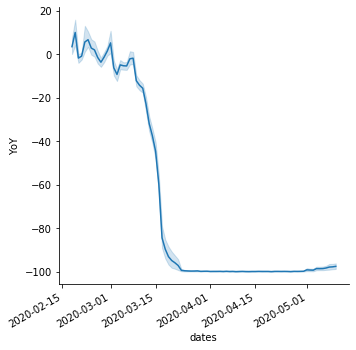

In [8]:
restra_state.sample(5)

mydata = restra_state
#default = 'Alabama'
#sns.boxplot(data=mydata)
g = sns.relplot(x="dates", y="YoY", kind="line", data=mydata)
g.fig.autofmt_xdate()

start = restra_state['dates'].min()
end = restra_state['dates'].max()

dates = list(pd.date_range(start, end, freq='D'))
options = [(i.strftime('%m/%d'), i) for i in dates]
index = (0, len(dates) - 1)
z = widgets.SelectionRangeSlider(
    options = options,
    index = index,
    description = 'Dates : ',
    orientation = 'horizontal',
    layout={'width': '400px'}
)


w = widgets.Dropdown(
    options=mydata['Name'].unique(),
    #value = default,
    description='States : ',
    disabled=False
)
display(z,w)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old'] ):
        print(change['new'])
        clear_output()
        display(z,w)
       # print(w.value)
        #print(z.value[0])
        #print(z.value[1])
        filter_list = [i and j and k for i, j, k in
                           zip(mydata['Name'] == w.value, mydata['dates'] >= z.value[0],
                               mydata['dates'] <= z.value[1])]
        temp_df = mydata[filter_list]
        g = sns.relplot(x="dates", y="YoY", kind="line", data=temp_df)
        g.fig.autofmt_xdate()

z.observe(on_change, names="value")
w.observe(on_change , names="value")

    

### Data Visualization using multiple graph for City dataset

 > We used the concept of multiple graphs for displaying the Covid-19 impact on various cities all at once with eah city having 
   it's own miniature graph to depict the YoY effect on Restaurant business for current year to last year starting from 02/18 
   to 05/10.
  
 > If we see there is slight uptick in the business of restaurants in few cities in US, namely in states like 
   Florida(Orlando/Tampa) , Texas (Houston/Austin/Dallas) and Georgia(Atlanta) which can be due to few factors  like 
    - Closure of lockdown in these states earlier than other states 
    - All these states are Republican Gov rules states
    - All these states are warmer states in comparison to other states , in Florida & Texas the temperature is already
      ranging above 85 F.
 
 > These upticks are too early to conclude anything , but further exploration can be done on those lines to see in furture 
    Whether these Republican ruled states were naive to open thier states to early or were they Brave enough to take the risk 
    and reap the benefits. That can be one line of thought o explore.
 > The other line of though for further exploration can be the impact of temperature on Covid-19, as all these states are 
   warmer where normally temperature generally goes beyond 90F touching even 100+F in summers. 
    

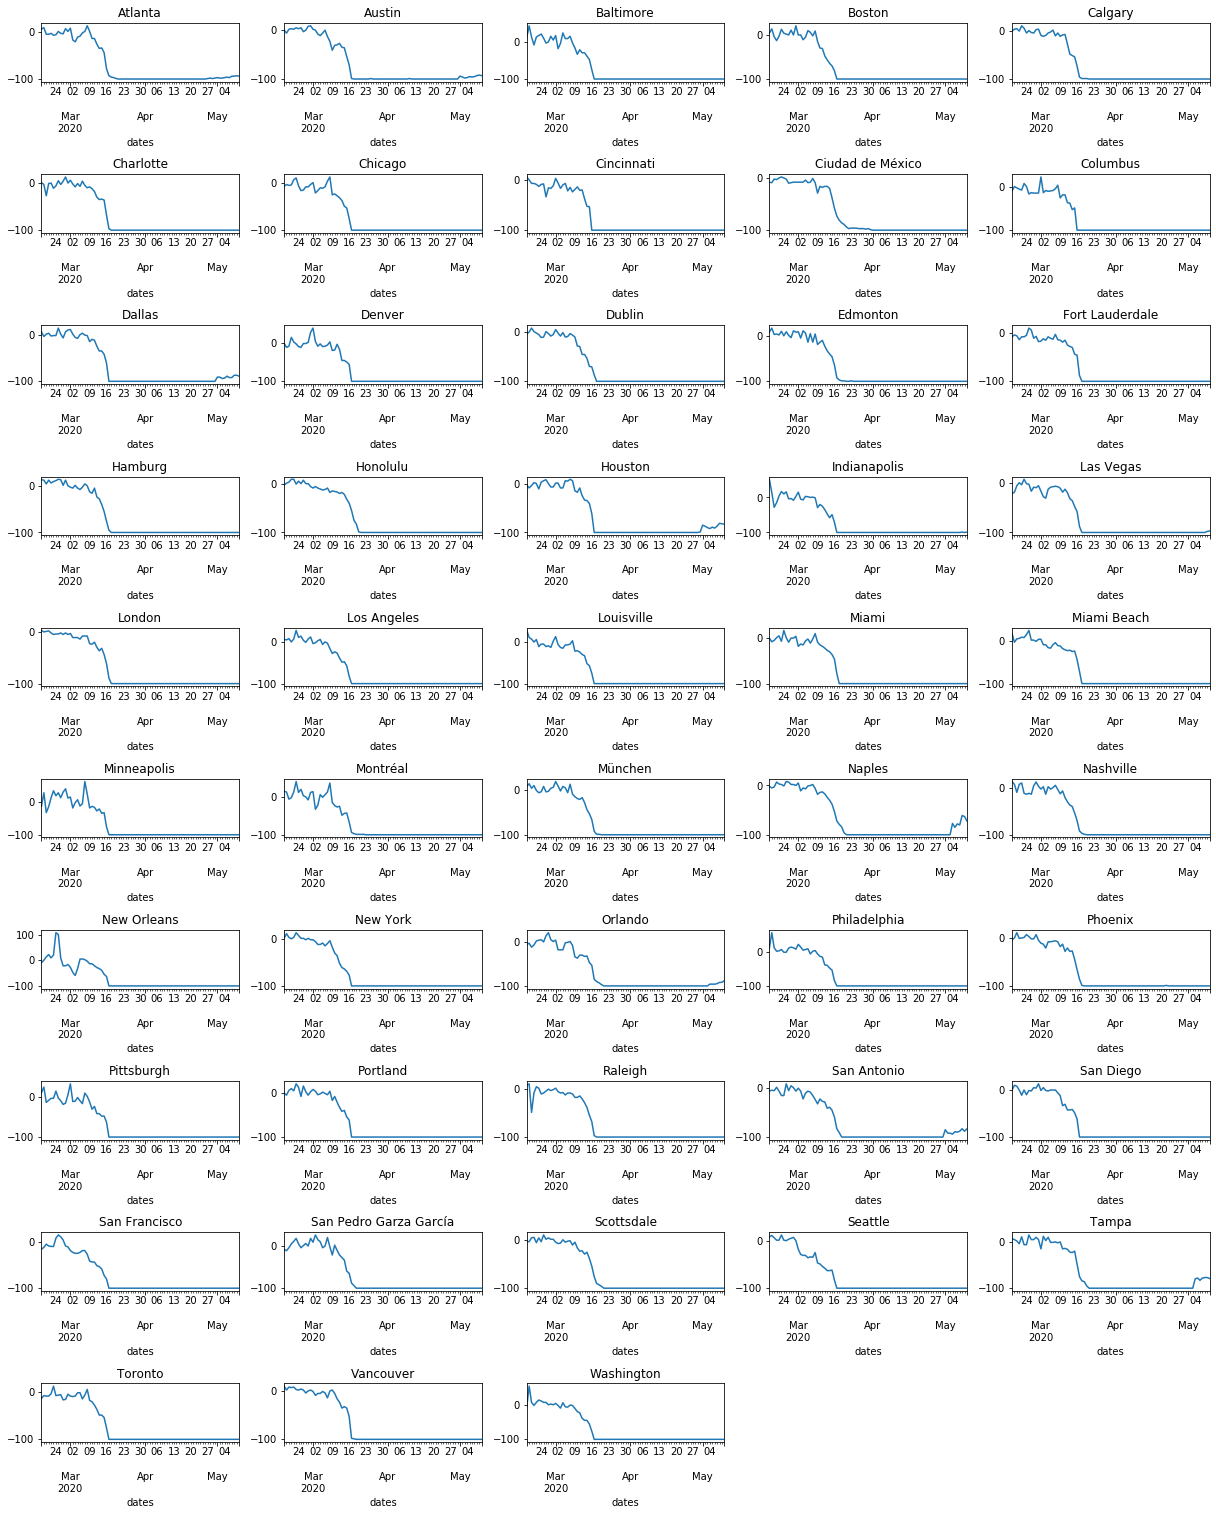

In [9]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


restra_city.head()
# multiple plots for all the cities in the data from open table
plt.figure(figsize=(17,100), facecolor='white')
plot_number = 1
for name in list(restra_city['Name'].unique()):
    # graph in the in the plot_number slot.
    ax = plt.subplot(48, 5, plot_number)
    
    restra_city[restra_city["Name"] == name].groupby("dates")["YoY"].sum().plot()
    ax.set_xlim('2020-02-18','2020-05-10') 
    ax.set_title(name)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

### Comparison of google trend for same time period 

> Took the raw data from google search trends for the time period for last 8 months , we can easily see that during the start 
  of lockdown , the google searches for preserving or freezing the food for consuption at later stages was at its peak YoY.
  Thus we can clearly conclude that people started cooking more at home and thus consuptions of raw meterial spiked up 
  which can attribute to more profits for FMCG companies and retailers like Costco/Amazon/Walmart/Whole Food/ Target/ Krogger 
  etc...
  

In [10]:

# Meanwhile  looking at google trendz in Food & Drinks segment, there is another very peculiar trend which occured at the same time when 
# Restaurant business was severly gettng impacted by Covid-19.

googTrnz = pd.read_csv("https://raw.githubusercontent.com/samriti0202/Data608/master/Final%20Project/multiTimeline.csv")
googTrnz.head(19)


#fig = px.line(googTrnz, x="Week", y="can you freeze: (United States)", color="Week", title="Covid-19 impact on restaurants for Countries")
#fig.update_layout(margin=dict(l=50, r=50, t=50, b=50), paper_bgcolor="white",template="simple_white")
#fig.update_traces(mode="markers+lines")
#fig.show()
fig = px.line(googTrnz, x="Week", y="can you freeze: (United States)", title='Google Trend for users search during Covid-19 lockdown.')
fig.update_layout(margin=dict(l=70, r=70, t=70, b=70), paper_bgcolor="black",template="plotly_dark")
fig.update_traces(mode="markers+lines")
fig.show()






# Summary

As we can clearly gain insight from the above graphs that since the lockdown started sometime close to Mar-15th , the restaurant industry as a whole had a very negative impact and growth actually dipped to -ve 100 on YoY to 2019. Thus many restaurants closed and people lost thier jobs. As the imapct of Covid-19 on humans particularly on daily wage earners is huge but studying the data for this time period can give us insight for future , as how to prepare ourselves in advance during these unprecendented time of pandemic in future and also this can be great tool in hands of Governments to prepare themselves better.

There can further ways to expand this Data Exploration of Covid-19 on other Industries like which Industries are booming and which Industries are in dooldrums. As earlier stated there can be fruitfull exploration on terms of "Impact of Temperature on Covid-19" and also "Republicans States vs Democratic States during Covid-19".

